In [1]:
import cortex
import numpy as np

In [ ]:
# surface = 'sub-09-stroke'
surface = "subj01"
# xfm = 'sub-09_ses-01_task-Fullfield_run-01MRIDeSkulledOptimizedFeatures'
xfm = "func1pt8_to_anat0pt8_autoFSbbr"

# mask = cortex.db.get_mask(surface,xfm,'cortical')
mask=cortex.utils.get_cortical_mask(surface, xfm)

mask_with_idx = np.zeros(mask.shape)
mask_with_idx[mask==False] = np.nan
mask_with_idx[mask==True] = np.arange(mask.sum())

mapper = cortex.get_mapper(surface,xfm, 'line_nearest', recache=True)

tmp = np.zeros(mask.shape)
tmp[mask_with_idx==1] = 1
voxel_vol = cortex.Volume(tmp,surface,xfm)

nc = mapper(voxel_vol).data.shape[0]
nc1 = int(np.floor(nc/2))
nc2 = nc-nc1

all_idx_1 = np.zeros((mask.sum(),nc1))
all_idx_2 = np.zeros((mask.sum(),nc2))

for j in np.arange(mask.sum()):    
    tmp = np.zeros(mask.shape)
    tmp[mask_with_idx==j] = 1
    voxel_vol = cortex.Volume(tmp,surface,xfm)
    tmp = mapper(voxel_vol).data
    all_idx_1[j] = tmp[:nc1]
    all_idx_2[j] = tmp[nc1:]
    if j%1000==0:
        print(j)

all_vox = np.zeros((mask.sum(),mask.sum()))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


In [ ]:
all_vox = np.zeros((mask.sum(),mask.sum()))

for j in np.arange(mask.sum()):    
    non_zero_1 = all_idx_1[j]>0
    sub_mat_1 = all_idx_1[:,non_zero_1].sum(1)
    all_vox[j,sub_mat_1>0] = 1
    non_zero_2 = all_idx_2[j]>0
    sub_mat_2 = all_idx_2[:,non_zero_2].sum(1)
    all_vox[j,sub_mat_2>0] = 1
    if j%1000==0:
        print(j)

In [ ]:
max_n_neighbors = int(np.max(all_vox.sum(1)))+1

all_vox_neighbors = np.zeros((mask.sum(),max_n_neighbors))-1

for j in np.arange(mask.sum()):    
    tmp = np.where(all_vox[j]>0)[0]
    tmp = np.concatenate([tmp,np.array([j])])
    all_vox_neighbors[j,0:len(tmp)] = tmp

In [25]:
# np.save('/Users/lwehbe/Desktop/AH_vox_neighborhood.npy',all_vox_neighbors)

In [26]:
max_2nd_neighbors = 80

all_vox_2nd_neighbors = np.zeros((mask.sum(),max_2nd_neighbors))-1

for j in np.arange(mask.sum()):    
    tmp2 = all_vox_neighbors[j]
    tmp2 = tmp2[tmp2>=0].astype(int)
    tmp = np.unique(all_vox_neighbors[tmp2])
    tmp = tmp[tmp>=0]
    all_vox_2nd_neighbors[j,:len(tmp)] = tmp

# np.save('/Users/lwehbe/Desktop/AH_vox_2nd_neighbors.npy',all_vox_2nd_neighbors)


In [28]:
vols = dict()

data = np.zeros((30,mask.sum()))

for i in range(30):
    voxels = all_vox_neighbors[10000+i]
#     voxels = np.where(all_vox[i+25000]>0)[0]
    voxels = voxels[voxels>=0]
    voxels = np.unique(voxels).astype(int)
    data[i][voxels] = 1
    data[i][10000+i] = 2
    vols['{}'.format(i)] = cortex.Volume(data[i],surface,xfm,vmin=0,vmax=2)
    
cortex.webshow(vols)

Started server on port 48727


<JS: window.viewer>

Stopping server


In [15]:
voxels

array([ 0.,  1.,  6., 77.])

In [13]:
all_idx_1.shape

(12904, 172180)

In [21]:
subject = 'sub-09-stroke'

# In order to get the number of vertices in this subject's cortical surface
# we have to load in their surfaces and get the number of points in each
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# This is the total number of vertices in both hemispheres combined
num_verts = surfs[0].pts.shape[0] + surfs[1].pts.shape[0]

# Creating a random dataset with one entry for each vertex
test_data = np.arange(num_verts)/num_verts

# This creates a Vertex object for our subject and test dataset
vertex_data = cortex.Vertex(test_data, subject)
# And now we can display it on a flatmap
# cortex.quickshow(vertex_data)
cortex.webshow(vertex_data)

Started server on port 41723


<JS: window.viewer>

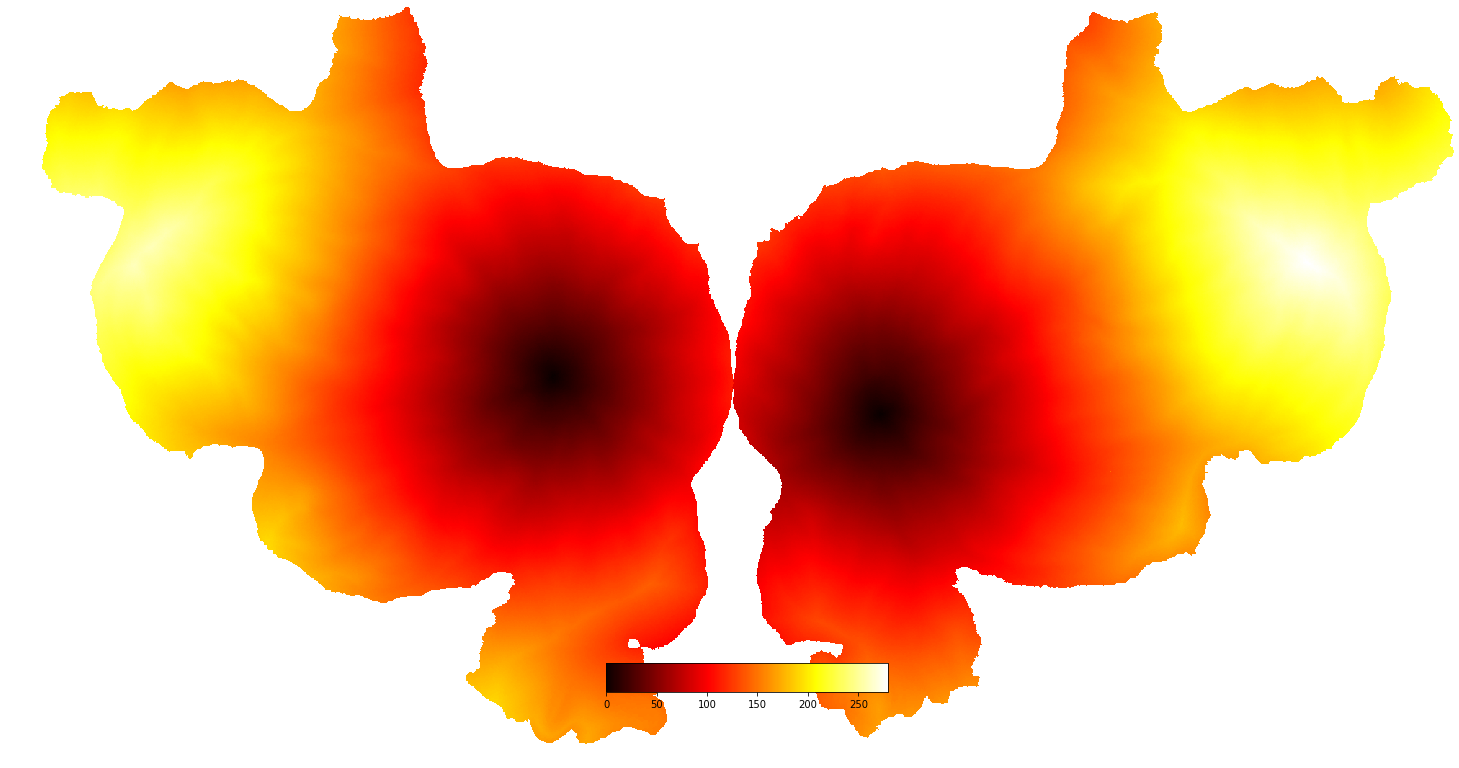

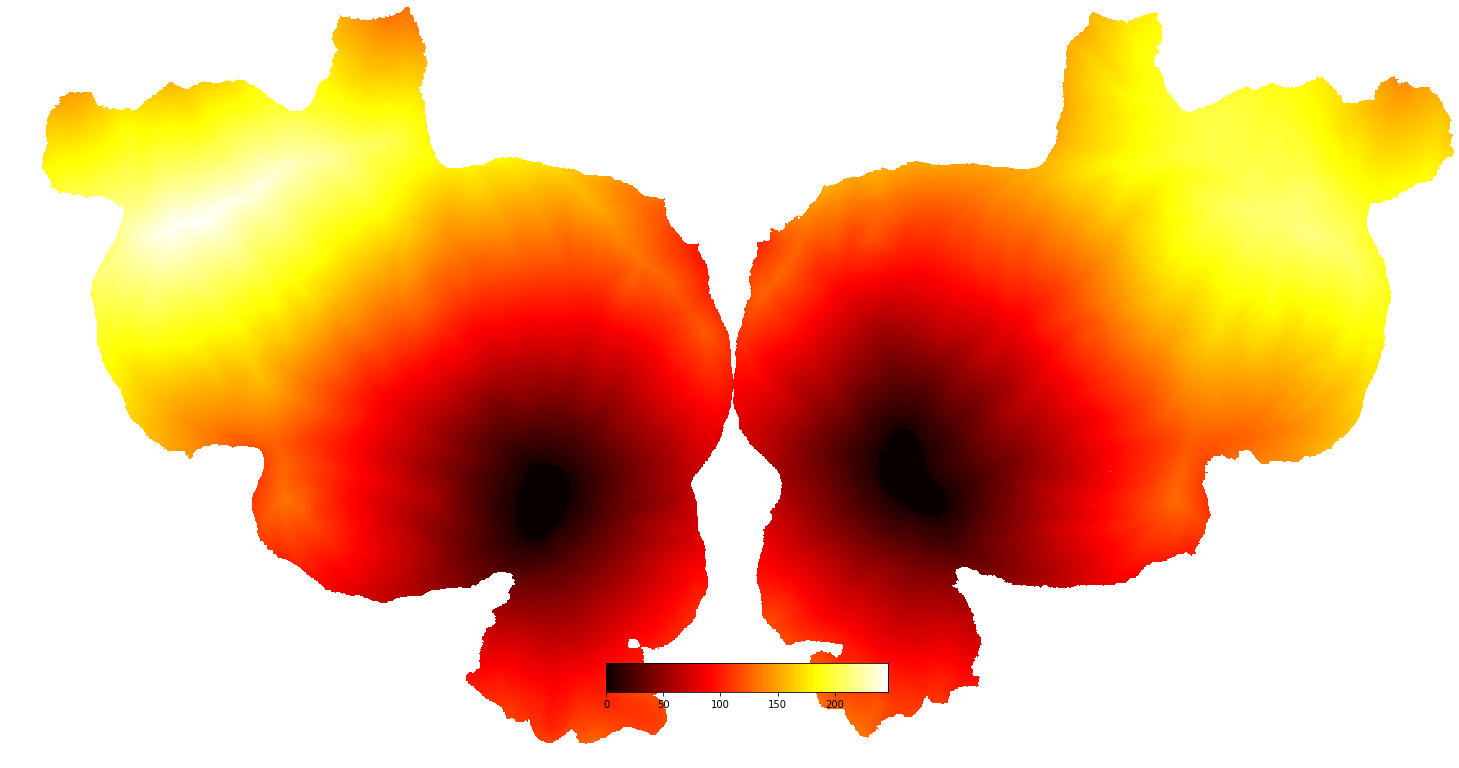

Stopping server
Stopping server


In [31]:
subject = "S1"

# First we need to import the surfaces for this subject
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# Then we will pick one vertex in each hemisphere to find distances to
vert = 10000
dists = [s.geodesic_distance(vert) for s in surfs]

# Now we can plot these distances onto a flatmap
all_dists = np.hstack((dists[0], dists[1]))
dist_map = cortex.Vertex(all_dists, subject, cmap="hot")
cortex.quickshow(dist_map,with_rois=False)
# plt.show()

# Alternatively, you can find the minimum distance from a set of points to the
# surface
# Here, we use an example of an ROI
all_eba = cortex.utils.get_roi_verts(subject, "EBA")["EBA"]

# We have to then separate these vertices by hemisphere
numl = surfs[0].pts.shape[0]
eba_verts = [all_eba[all_eba < numl], all_eba[all_eba >= numl] - numl]

# Now look at geodesic distances for each hemisphere separately
dists = [s.geodesic_distance(verts) for s, verts in zip(surfs, eba_verts)]
all_dists = np.hstack((dists[0], dists[1]))

# And now plot these distances onto the cortical surface
dist_map = cortex.Vertex(all_dists, subject, cmap="hot")
cortex.quickshow(dist_map,with_rois=False);
# plt.show()